<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Summary" data-toc-modified-id="Summary-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Summary</a></span></li><li><span><a href="#Loading-packages" data-toc-modified-id="Loading-packages-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Loading packages</a></span></li><li><span><a href="#Loading-the-data" data-toc-modified-id="Loading-the-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Loading the data</a></span></li><li><span><a href="#Exploring-the-dataset" data-toc-modified-id="Exploring-the-dataset-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exploring the dataset</a></span></li><li><span><a href="#Model-Building" data-toc-modified-id="Model-Building-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model Building</a></span></li><li><span><a href="#Predictions" data-toc-modified-id="Predictions-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Predictions</a></span></li></ul></div>

# Summary

# Loading packages

In [24]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.lines import Line2D
from mpl_toolkits import mplot3d
import pandas as pd
import seaborn as sns
import os
import requests
import missingno as msno
import warnings
import time
warnings.simplefilter(action='ignore', category=FutureWarning)
from urllib import request
from sklearn.preprocessing import LabelEncoder
import keras
from tensorflow.compat.v1.keras import backend as KB
from keras.layers import Dense, Flatten, Input, Lambda
from keras.models import Model, load_model
from keras import optimizers
from keras.callbacks import EarlyStopping
import tensorflow.compat.v1 as tf
# On désactive la eager execution pour rendre tensorflow compatible avec nos scripts
tf.disable_eager_execution()
import tensorflow_hub as hub

# Loading the data

In [15]:
test_url = "https://storage.googleapis.com/kagglesdsdata/competitions/17777/869809/test.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1620373333&Signature=bmy6sGK2iuXzJYweu2NmmSBFEAEf%2Bswtbc8%2F%2F5qs2JLpts0CHjYsbBT1L%2FsykkEj4cWA2iyKTjs7LfGZj3i5bYTZwg2O2ZGA2g2YzA0z9TW7n%2FotxegI%2Bzl%2FpmTTHEJki3NSkNX2tDybv%2BF2KxGsdiGCGyX8Nsm1u6%2Bwd32Il2EIRPgP%2BxZwkw%2FumQ5E7ut7ryzvTxEwWz6XwHNCpjGuT1KVrSQY4%2FrUNiSB4oHJc1H%2BmEgG8i87cFSjtiIyVO2spuxKKc8VhVFaDeSRi7R%2B%2FQ7Knk6ZSXaHgYyMjoZAn65Vg2wm6xcEVQNggYmjUE3nEavepO2X4an1HqOnUSseUg%3D%3D&response-content-disposition=attachment%3B+filename%3Dtest.csv"
train_url = "https://storage.googleapis.com/kagglesdsdata/competitions/17777/869809/train.csv?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1620373395&Signature=CX3TP4uT7VaGEcy8uVyIadgNJOdP415F4DQgTPTp37vSIJidekF%2FtKotU1VCBVwycS5PWJYbJESblLYpY8rDdiqxt%2BhEEXYWveVmpLJxVtrI%2Bsx3T%2Bh45ruy4t1kBWCY8HQkG3GgJT6TqTvxY0tdk0qMBIVWVwDWNdMHHjR61yr5wIffsqQLV0P3Eil3V%2B9rz4lWaU1uxSgKMbe32ExRPEY%2FrNrkrGKMLlrZi%2BgELWNaIS0RpPBxV%2FCTGlddj3y%2FsrSy900mviTbpxvQB17FchSGy8E%2BgwAdkHmLrMWVFRUMecPuk5TFCIu1kQFrDGHPPIT%2FPWA8EeyvqDn0MynejA%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.csv"
if not os.path.exists('data'):
    os.makedirs('data')

if not os.path.exists("./data/train.csv"):
    request.urlretrieve (train_url, "./data/train.csv")
if not os.path.exists("./data/test.csv"):
    request.urlretrieve (test_url, "./data/test.csv")

train_data = pd.read_csv("./data/train.csv")
test_data = pd.read_csv("./data/test.csv")

# Exploring the dataset

In [16]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [17]:
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


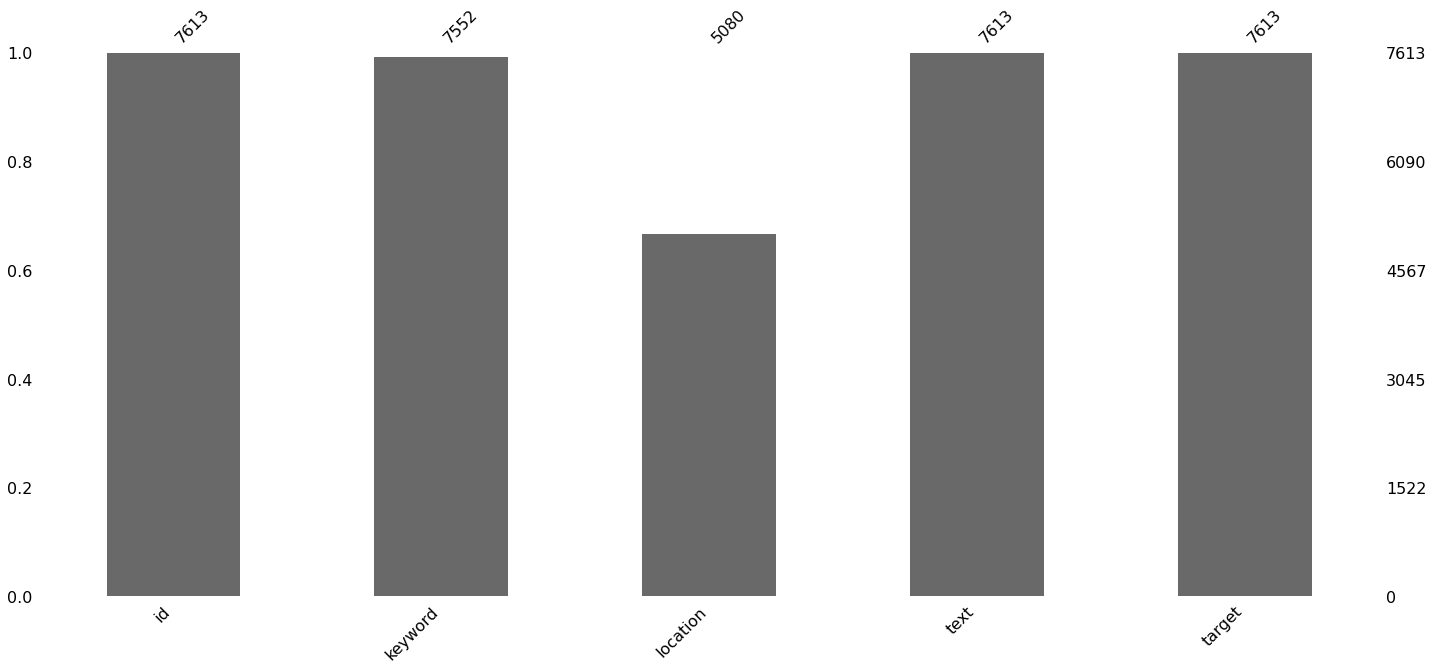

In [25]:
msno.bar(train_data)

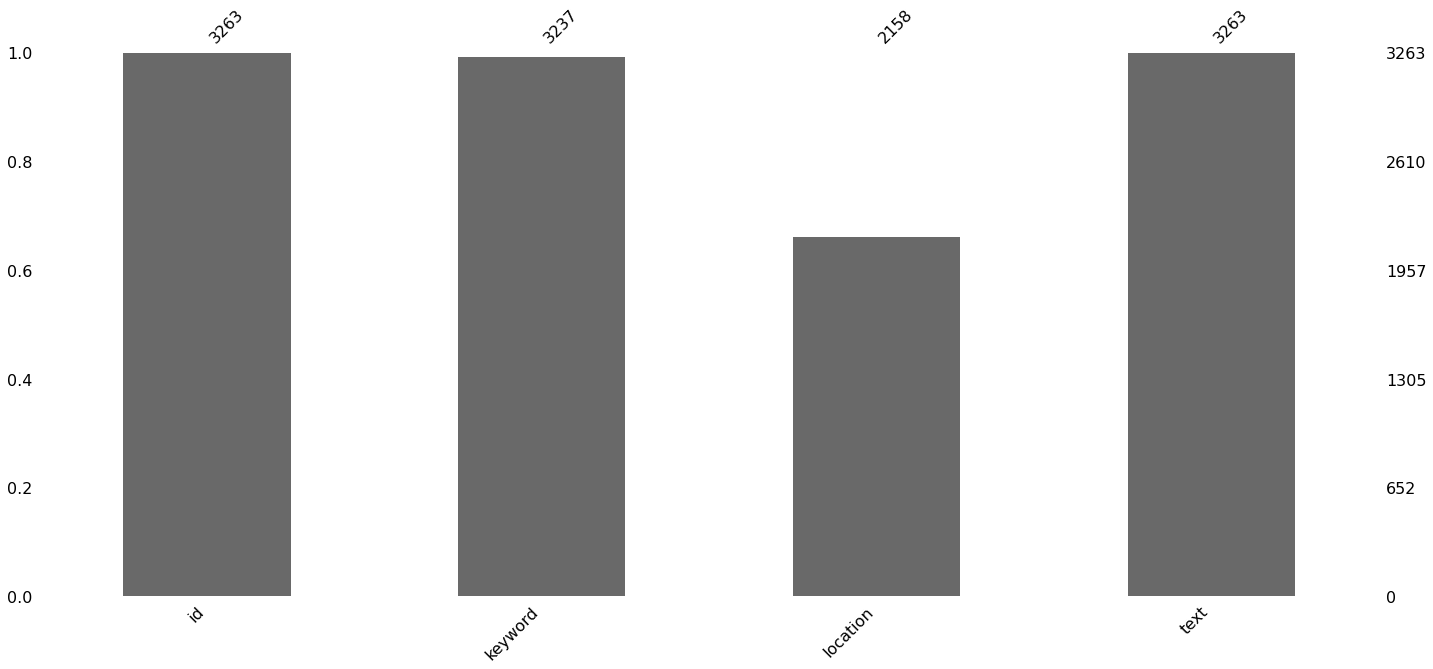

In [26]:
msno.bar(test_data)

Text(0.5, 0.98, 'Target distribution')

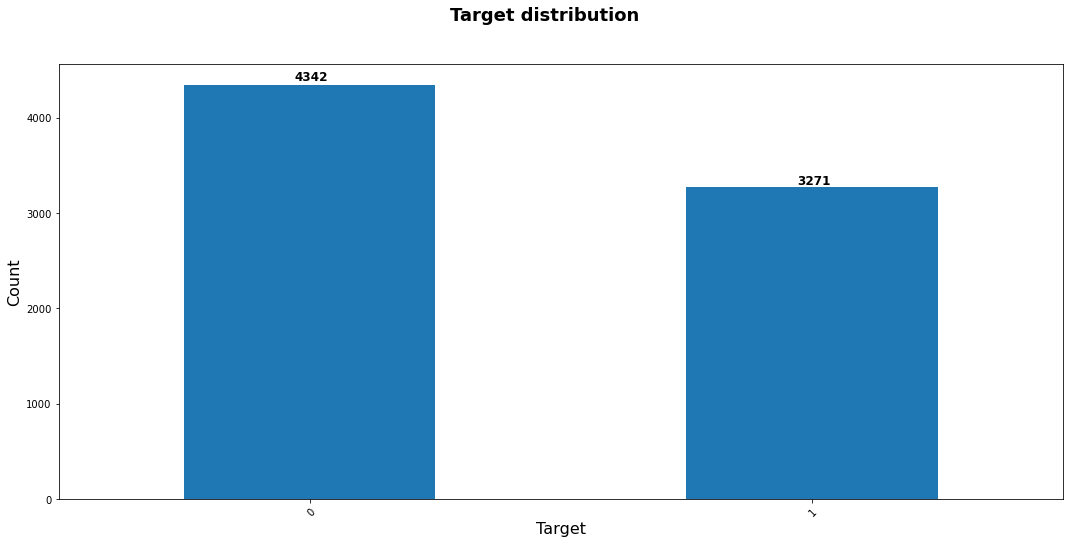

In [22]:
fig, ax = plt.subplots(figsize = (18, 8))
train_data["target"].value_counts().plot(kind = "bar", ax = ax)
plt.xticks(rotation = 45, rotation_mode = "anchor", ha = "right")
for idx, value in enumerate(train_data["target"].value_counts()):
    ax.text(idx - 0.03, value + 0.01*value, value, fontweight = "bold", fontsize = 12)
ax.set_xlabel("Target", fontsize = 16)
ax.set_ylabel("Count", fontsize = 16)
plt.suptitle("Target distribution", fontsize = 18, fontweight = "bold")

# Model Building

In [28]:
X_train = train_data["text"].to_numpy()
y_train = train_data["target"].to_numpy()
X_test = test_data["text"].to_numpy()

In [30]:
le = LabelEncoder()
le.fit(y_train)

LabelEncoder()

In [31]:
def encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def decode(le, one_hot):
    dec = np.argmax(one_hot, axis = 1)
    return(le.inverse_transform(dec))

In [32]:
X_train_enc = X_train
y_train_enc = encode(le, y_train)

In [34]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/2" 
embed = hub.Module(module_url)

In [35]:
def UniversalSentenceEncoding(x):
    return embed(tf.squeeze(tf.cast(x, tf.string)))

In [102]:
input_layer = Input(shape = (1,), dtype = tf.string)
embedding_layer = Lambda(UniversalSentenceEncoding, output_shape = (512,))(input_layer)
dense_layer = Dense(256, activation = "relu")(embedding_layer)
dense_layer_2 = Dense(128, activation = "relu")(dense_layer)
prediction_layer = Dense(2, activation = "softmax")(dense_layer_2)

nlp_model = Model(inputs = [input_layer], outputs = prediction_layer)

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [103]:
nlp_model.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 1)]               0         
_________________________________________________________________
lambda_6 (Lambda)            (None, 512)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_22 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_23 (Dense)             (None, 2)                 258       
Total params: 164,482
Trainable params: 164,482
Non-trainable params: 0
_________________________________________________________________


In [92]:
nlp_model.compile(loss='categorical_crossentropy', optimizer = "adam", metrics=["accuracy"])
callback = EarlyStopping(monitor='val_loss', patience=5, min_delta = 0.0001, restore_best_weights = True)

In [93]:
start_clock = time.time()
with tf.Session() as session:
    KB.set_session(session)
    session.run(tf.global_variables_initializer())
    session.run(tf.tables_initializer())
    training_session = nlp_model.fit(X_train_enc, y_train_enc, epochs = 50, batch_size = 50, verbose=2, 
                                     validation_split = 0.3, callbacks = [callback])
    nlp_model.save_weights("./data/nlp_model.h5")
print("Model trained in {}s".format(round(time.time() - start_clock)))

Train on 5329 samples, validate on 2284 samples
Epoch 1/50


C:\Users\Antoine\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


5329/5329 - 5s - loss: 0.4690 - accuracy: 0.8003 - val_loss: 0.4015 - val_accuracy: 0.8341
Epoch 2/50
5329/5329 - 3s - loss: 0.4137 - accuracy: 0.8206 - val_loss: 0.4216 - val_accuracy: 0.8201
Epoch 3/50
5329/5329 - 3s - loss: 0.3876 - accuracy: 0.8362 - val_loss: 0.4113 - val_accuracy: 0.8249
Epoch 4/50
5329/5329 - 3s - loss: 0.3597 - accuracy: 0.8457 - val_loss: 0.4212 - val_accuracy: 0.8192
Epoch 5/50
5329/5329 - 3s - loss: 0.3221 - accuracy: 0.8666 - val_loss: 0.4278 - val_accuracy: 0.8130
Epoch 6/50
5329/5329 - 3s - loss: 0.2822 - accuracy: 0.8867 - val_loss: 0.4784 - val_accuracy: 0.8100
Epoch 7/50
5329/5329 - 3s - loss: 0.2277 - accuracy: 0.9127 - val_loss: 0.5406 - val_accuracy: 0.7916
Epoch 8/50
5329/5329 - 3s - loss: 0.1789 - accuracy: 0.9315 - val_loss: 0.5949 - val_accuracy: 0.7916
Epoch 9/50
5329/5329 - 3s - loss: 0.1505 - accuracy: 0.9443 - val_loss: 0.6650 - val_accuracy: 0.8047
Epoch 10/50
5329/5329 - 3s - loss: 0.1164 - accuracy: 0.9572 - val_loss: 0.7438 - val_accurac

# Predictions

In [94]:
with tf.Session() as session:
    KB.set_session(session)
    session.run(tf.global_variables_initializer())
    session.run(tf.tables_initializer())
    nlp_model.load_weights('./data/nlp_model.h5')
    predictions = nlp_model.predict(X_test, batch_size = 100)

In [95]:
predictions

array([[0.32812214, 0.67187786],
       [0.0463776 , 0.9536224 ],
       [0.1895535 , 0.81044656],
       ...,
       [0.05779055, 0.9422095 ],
       [0.45685574, 0.5431443 ],
       [0.38907456, 0.61092544]], dtype=float32)

In [96]:
y_predictions = decode(le, predictions)

In [97]:
y_predictions

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [98]:
output = pd.DataFrame()

In [99]:
output["id"] = test_data["id"]
output["target"] = y_predictions

In [100]:
output.head()

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1


In [101]:
output.to_csv(r"./data/output3.csv", index = False, header = True)

We get a score of 0.81949